#Zadanie 4 (7 pkt)
Celem zadania jest zaimplementowanie algorytmu drzewa decyzyjnego ID3 dla zadania klasyfikacji. Trening i test należy przeprowadzić dla zbioru Iris. Proszę przeprowadzić eksperymenty najpierw dla DOKŁADNIE takiego podziału zbioru testowego i treningowego jak umieszczony poniżej. W dalszej części należy przeprowadzić analizę działania drzewa dla różnych wartości parametrów. Proszę korzystać z przygotowanego szkieletu programu, oczywiście można go modyfikować według potrzeb. Wszelkie elementy szkieletu zostaną wyjaśnione na zajęciach.

* Implementacja funkcji entropii - **0.5 pkt**
* Implementacja funkcji entropii zbioru - **0.5 pkt**
* Implementacja funkcji information gain - **0.5 pkt**
* Zbudowanie poprawnie działającego drzewa klasyfikacyjnego i przetestowanie go na wspomnianym wcześniej zbiorze testowym. Jeśli w liściu występuje kilka różnych klas, decyzją jest klasa większościowa. Policzenie accuracy i wypisanie parami klasy rzeczywistej i predykcji. - **4 pkt**
* Przeprowadzenie eksperymentów dla różnych głębokości drzew i podziałów zbioru treningowego i testowego (zmiana wartości argumentu test_size oraz usunięcie random_state). W tym przypadku dla każdego eksperymentu należy wykonać kilka uruchomień programu i wypisać dla każdego uruchomienia accuracy. - **1.5 pkt**


In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import math
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt

iris = load_iris()

x = iris.data
y = iris.target

In [2]:
def entropy_func(class_count, num_samples):
    probability = class_count / num_samples
    return -probability * np.log2(probability)


class Group:
    def __init__(self, group_classes):
        self.group_classes = group_classes
        self.entropy = self.group_entropy()

    def __len__(self):
        return self.group_classes.size

    def group_entropy(self):
        class_counts = Counter(self.group_classes).values()
        entropy = 0
        num_samples = len(self)
        for class_count in class_counts:
            entropy += entropy_func(class_count, num_samples)
        return entropy


class Node:
    def __init__(self, split_feature=None, split_val=None, depth=None, child_node_a=None, child_node_b=None, val=None):
        self.split_feature = split_feature
        self.split_val = split_val
        self.depth = depth
        self.child_node_a = child_node_a
        self.child_node_b = child_node_b
        self.val = val

    def predict(self, data):
        if self.val is not None:
            return self.val
        elif data[self.split_feature] <= self.split_val:
            return self.child_node_a.predict(data)
        else:
            return self.child_node_b.predict(data)


class DecisionTreeClassifier(object):
    def __init__(self, max_depth):
        self.depth = 0
        self.max_depth = max_depth
        self.tree = None

    @staticmethod
    def get_split_entropy(group_a, group_b):
        parent_samples = len(group_a) + len(group_b)
        weighted_entropy = (len(group_a) / parent_samples * group_a.entropy +
                            len(group_b) / parent_samples * group_b.entropy)
        return weighted_entropy

    def get_information_gain(self, parent_group, child_group_a, child_group_b):
        information_gain = parent_group.entropy - self.get_split_entropy(child_group_a, child_group_b)
        return information_gain

    def get_best_feature_split(self, feature_values, classes):
        best_info_gain = -1
        best_split_val = None
        parent_group = Group(classes)
        for split_val in np.unique(feature_values):
            left_indices = feature_values <= split_val
            right_indices = feature_values > split_val

            group_a = Group(classes[left_indices])
            group_b = Group(classes[right_indices])

            info_gain = self.get_information_gain(parent_group, group_a, group_b)

            if info_gain > best_info_gain:
                best_info_gain = info_gain
                best_split_val = split_val
        return best_info_gain, best_split_val

    def get_best_split(self, data, classes):
        best_feature = None
        best_split_val = None
        best_info_gain = -1

        for feature_idx in range(data.shape[1]):
            feature_values = data[:, feature_idx]
            info_gain, split_val = self.get_best_feature_split(feature_values, classes)

            if info_gain > best_info_gain:
                best_info_gain = info_gain
                best_feature = feature_idx
                best_split_val = split_val
        return best_feature, best_split_val

    def build_tree(self, data, classes, depth=0):
        if len(set(classes)) == 1 or depth == self.max_depth:
            return Node(val=Counter(classes).most_common(1)[0][0])

        best_feature, best_split_val = self.get_best_split(data, classes)

        left_indices = data[:, best_feature] <= best_split_val
        right_indices = data[:, best_feature] > best_split_val

        child_node_a = self.build_tree(data[left_indices], classes[left_indices], depth+1)
        child_node_b = self.build_tree(data[right_indices], classes[right_indices], depth+1)

        return Node(split_feature=best_feature, split_val=best_split_val, depth=depth, child_node_a=child_node_a, child_node_b=child_node_b)

    def fit(self, data, classes):
        self.tree = self.build_tree(data, classes)

    def predict(self, data):
        return np.array([self.tree.predict(sample) for sample in data])

**Różne głębokości przeszukiwań dla zadanego podziału zbioru treningowego i testowego**

Głębokość: 1, Dokładność: 60.00%
Prawdziwa klasa: 1, Predykcja: 1
Prawdziwa klasa: 2, Predykcja: 1
Prawdziwa klasa: 2, Predykcja: 1
Prawdziwa klasa: 1, Predykcja: 1
Prawdziwa klasa: 0, Predykcja: 0
Prawdziwa klasa: 2, Predykcja: 1
Prawdziwa klasa: 1, Predykcja: 1
Prawdziwa klasa: 0, Predykcja: 0
Prawdziwa klasa: 0, Predykcja: 0
Prawdziwa klasa: 1, Predykcja: 1
Prawdziwa klasa: 2, Predykcja: 1
Prawdziwa klasa: 0, Predykcja: 0
Prawdziwa klasa: 1, Predykcja: 1
Prawdziwa klasa: 2, Predykcja: 1
Prawdziwa klasa: 2, Predykcja: 1
Głębokość: 2, Dokładność: 86.67%
Prawdziwa klasa: 1, Predykcja: 2
Prawdziwa klasa: 2, Predykcja: 2
Prawdziwa klasa: 2, Predykcja: 2
Prawdziwa klasa: 1, Predykcja: 1
Prawdziwa klasa: 0, Predykcja: 0
Prawdziwa klasa: 2, Predykcja: 1
Prawdziwa klasa: 1, Predykcja: 1
Prawdziwa klasa: 0, Predykcja: 0
Prawdziwa klasa: 0, Predykcja: 0
Prawdziwa klasa: 1, Predykcja: 1
Prawdziwa klasa: 2, Predykcja: 2
Prawdziwa klasa: 0, Predykcja: 0
Prawdziwa klasa: 1, Predykcja: 1
Prawdziwa 

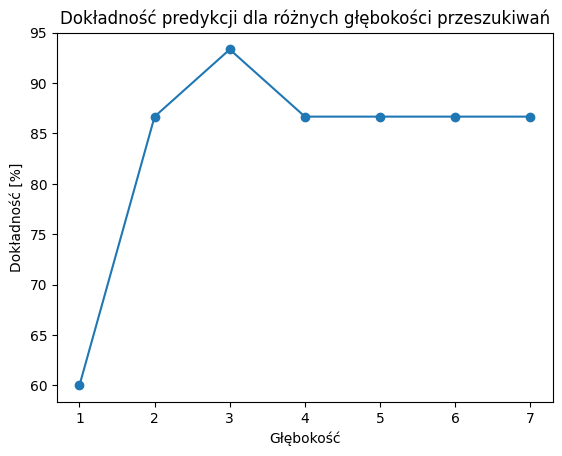

In [3]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=123)

def results_depth_original_data(max_depth):
  results={}
  for depth in range(1, max_depth):
      dc = DecisionTreeClassifier(max_depth=depth)
      dc.fit(x_train, y_train)
      predictions = dc.predict(x_test)
      accuracy = np.mean(predictions == y_test)
      results[depth]=accuracy*100
      print(f"Głębokość: {depth}, Dokładność: {(accuracy*100):.2f}%")
      for true, pred in zip(y_test, predictions):
        print(f"Prawdziwa klasa: {true}, Predykcja: {pred}")
  return results
results = results_depth_original_data(8)
plt.plot(results.keys(), results.values(), marker='o')
plt.xticks(list(results.keys()))
plt.ylabel('Dokładność [%]')
plt.xlabel('Głębokość')
plt.title('Dokładność predykcji dla różnych głębokości przeszukiwań')
plt.show()

W przypadku zadanego podziału danych testowych i treningowych, najlepszą głębokością przeszukiwań jest głębokość 3. W przypadku mniejszych głębokości drzewo nie jest w stanie w pełni rozróżniać klas na podstawie cech, a w efekcie występuje niedopasowanie, co prowadzi do niskiej dokładności predykcji. W przypadku większych głębokości, które są zbyt duże, drzewo się przeucza, dopasowując się nadmiernie do danych treningowych i traci zdolność do generalizacji na zbiorze testowym, przez co zmniejsza się dokładność predykcji.

**Zmiana wielkości zbioru testowego dla różnych głębokości przeszukiwań**

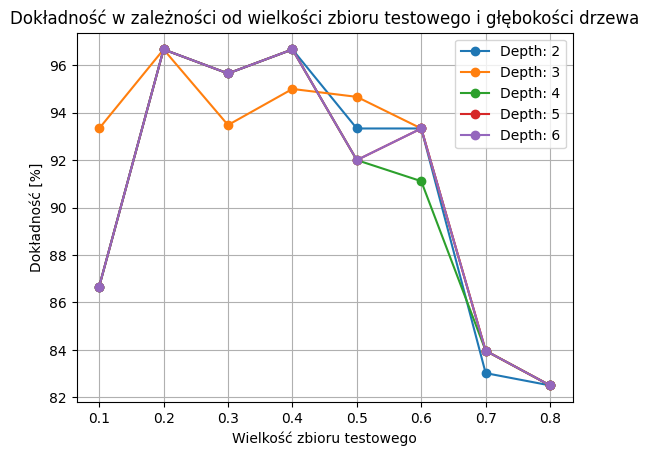

In [ ]:
results = {depth: [] for depth in range(2, 7)}
test_sizes = np.arange(0.1, 0.9, 0.1)
for test_size in test_sizes:
    for max_depth in range(2, 7):
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=123)
        dc = DecisionTreeClassifier(max_depth=max_depth)
        dc.fit(x_train, y_train)
        predictions = dc.predict(x_test)
        accuracy = np.mean(predictions == y_test)
        results[max_depth].append(accuracy*100)

plt.figure()
for depth, accuracies in results.items():
    plt.plot(test_sizes, accuracies, marker='o', label=f'Depth: {depth}')

plt.title('Dokładność w zależności od wielkości zbioru testowego i głębokości drzewa')
plt.xlabel('Wielkość zbioru testowego')
plt.ylabel('Dokładność [%]')
plt.legend()
plt.xticks(ticks=test_sizes)
plt.grid(True)
plt.show()

W przypadku zmiany wielkości zbioru testowego najlepsze wyniki osiągnięto dla podziału 0.2, który zapewnia wystarczającą reprezentatywność danych w zbiorze testowym i wystarczająco dużą wielkość zbioru uczącego do odpowiedniej nauki drzewa. W przypadku podziału 0.1 widać, że dla większej głębokości wyniki są znacznie gorsze, ponieważ występuje przeuczenie - model za bardzo dopasowuje się do zbioru treningowego i dla małych wielkości zbioru testowego, traci zdolność generalizacji. Od podziału 0.6, dokładność predykcji dla wszystkich głębokości znacząco spada, ponieważ model nie posiada wystarczającej ilości danych w zbiorze treningowym do efektywnego uczenia. Nie jest przez to w stanie dokładnie przewidywać klas w zbiorze testowym.

**Różne głębokości przeszukiwań dla zadanego rozmiaru zbioru testowego i losowego podziału danych**

Głębokość 1: Średnia dokładność = 60.67%
Głębokość 2: Średnia dokładność = 94.67%
Głębokość 3: Średnia dokładność = 94.67%
Głębokość 4: Średnia dokładność = 93.33%
Głębokość 5: Średnia dokładność = 93.33%
Głębokość 6: Średnia dokładność = 93.33%
Głębokość 7: Średnia dokładność = 93.33%


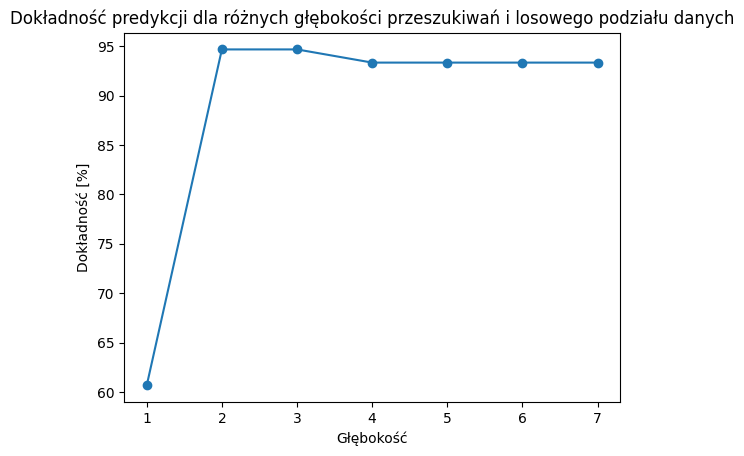

In [ ]:
results = {depth: [] for depth in range(1, 8)}

for _ in range(10):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1)

    for max_depth in range(1, 8):
        dc = DecisionTreeClassifier(max_depth=max_depth)
        dc.fit(x_train, y_train)
        predictions = dc.predict(x_test)
        accuracy = np.mean(predictions == y_test)
        results[max_depth].append(accuracy*100)

for depth, accuracies in results.items():
    results[depth] = np.mean(accuracies)
    print(f"Głębokość {depth}: Średnia dokładność = {np.mean(accuracies):.2f}%")

plt.plot(results.keys(), results.values(), marker='o')
plt.xticks(list(results.keys()))
plt.ylabel('Dokładność [%]')
plt.xlabel('Głębokość')
plt.title('Dokładność predykcji dla różnych głębokości przeszukiwań i losowego podziału danych')
plt.show()

W przypadku zadanego rozmiaru zbioru testowego i zmian głębokości przeszukiwań dla losowych danych wnioski pokrywają się z przypadkiem konkretnego podziału danych. Najbardziej optymalną głębokością przeszukiwań jest przeważnie 3, dokładność nie zmienia się powyżej głębokości 4-5, ponieważ dalej następuje przeuczenie i model za bardzo dopasowuje się do danych treningowych. W przypadku mniejszych głębokości następuje niedopasowanie, jednak konkretne wartości głębokości i powodowana przez nie dokładność zależą od konkretnego podziału danych. W większości przypadków model radzi sobie znacznie lepiej niż w przypadku zadanego wcześniej podziału, osiągając przy głębokościach większych od 4 dokładność na poziomie ponad 90% (w poprzednim przypadku osiągając 87%).

**Zmiana wielkości zbioru testowego dla różnych głębokości przeszukiwań przy losowym podziale danych**

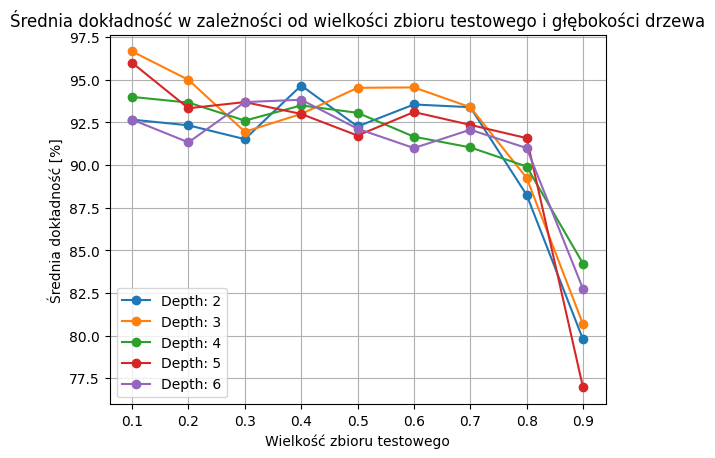

In [ ]:
results = {depth: [] for depth in range(2, 7)}
test_sizes = np.arange(0.1, 1.0, 0.1)

for test_size in test_sizes:
    for max_depth in range(2, 7):
        accuracies = []
        for _ in range(10):
            x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size)

            dc = DecisionTreeClassifier(max_depth=max_depth)
            dc.fit(x_train, y_train)
            predictions = dc.predict(x_test)
            accuracy = np.mean(predictions == y_test)
            accuracies.append(accuracy*100)

        results[max_depth].append(np.mean(accuracies))

plt.figure()
for depth, accuracies in results.items():
    plt.plot(test_sizes, accuracies, marker='o', label=f'Depth: {depth}')
plt.title('Średnia dokładność w zależności od wielkości zbioru testowego i głębokości drzewa')
plt.xlabel('Wielkość zbioru testowego')
plt.ylabel('Średnia dokładność [%]')
plt.legend()
plt.xticks(ticks=test_sizes)
plt.grid(True)
plt.show()

Przy losowym podziale danych, nalepsze rezultaty osiągano przy podziale zbioru w proporcjach 1:9. Przeważnie dla wielkości zbioru testowego 0.1 w stosunku do zbioru treningowego wyniki były znacznie lepsze niż w przypadku podziału danych określonego w zadaniu. Możliwe, że w zadanym random_state dane w zbiorze testowym były mało reprezentatywne, przez co osiągano gorsze wyniki dla modeli o większej głębokości przeszukiwań, ponieważ występowało w nich przeuczenie.
W przypadku losowych danych, podobnie jak w poprzednim przykładzie, dokładność pogarszała się wraz ze zmniejszaniem się zbioru treningowego, co spowodowane jest zbytnim dopasowywaniem się modeli do danych widzianych w trakcie uczenia.